In [7]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [8]:
# Seed
torch.manual_seed(42)

# Prepare training and test data.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

train_data_loader = DataLoader(training_data, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

In [9]:
# Define network.
class FashionNetwork(nn.Module):
    def __init__(self):
        super(FashionNetwork, self).__init__()
    
        self.layer1 = torch.nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = torch.nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer3 = torch.nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            nn.ReLU())
        
        self.flatten = nn.Flatten()
        
        self.layer4 = nn.Sequential(
            nn.Linear(128 * 3 * 3, 128),
            nn.ReLU()
        )
        
        self.layer5 = nn.Sequential(
            nn.Linear(128, 10),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.flatten(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

In [10]:
def train_loop(model, data_loader, loss_function, optimizer):
    total_loss = 0.0
    
    for batch, (data, labels) in enumerate(data_loader):
        # Feed data through network and compute loss.
        prediction = model(data)
        loss = loss_function(prediction, labels)
        total_loss += loss
 
        # Zero gradients.
        optimizer.zero_grad()
 
        # Perform backpropagation and accumulate gradients.
        loss.backward()
 
        # Update network parameters.
        optimizer.step()
    
    return total_loss / len(data_loader)

In [11]:
def test_loop(data_loader, model, loss_function):
    n_samples = len(data_loader.dataset)
    n_batches = len(data_loader)
    loss, n_correct = 0, 0
 
    with torch.no_grad():
        for data, labels in data_loader:
            # Feed data through network and accumulate loss.
            prediction = model(data)
            loss += loss_function(
                prediction, labels
            )
            n_correct += (
                (prediction.argmax(1) == labels)
                .type(torch.float)
                .sum()
                .item()
            )
 
    print(
        f"Test Accuracy: {n_correct / n_samples:.2%}, "
        f"Test Loss: {loss / n_batches:.4}"
    )
    return loss / n_batches

In [12]:
def train(model, train_data, test_data, optimizer,loss_fn, n_epochs=10):
    train_history = np.zeros(n_epochs)
    test_history = np.zeros(n_epochs)
      
    for t in range(n_epochs):
        print(f"Epoch {t + 1:02}", end=" ", flush=True)
        train_history[t] = train_loop(model, train_data, loss_fn, optimizer)
        test_history[t] = test_loop(test_data, model, loss_fn)
    
    return model, train_history, test_history

In [13]:
model = FashionNetwork()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn=nn.CrossEntropyLoss()

model, train_history, test_history = train(model, train_data_loader, test_data_loader, optimizer, loss_fn)

Epoch 01 Test Accuracy: 79.34%, Test Loss: 1.667
Epoch 02 Test Accuracy: 82.08%, Test Loss: 1.64
Epoch 03 Test Accuracy: 85.01%, Test Loss: 1.61
Epoch 04 Test Accuracy: 84.04%, Test Loss: 1.62
Epoch 05 Test Accuracy: 86.45%, Test Loss: 1.595
Epoch 06 Test Accuracy: 87.79%, Test Loss: 1.582
Epoch 07 Test Accuracy: 88.29%, Test Loss: 1.577
Epoch 08 Test Accuracy: 89.15%, Test Loss: 1.569
Epoch 09 Test Accuracy: 88.43%, Test Loss: 1.576
Epoch 10 Test Accuracy: 88.79%, Test Loss: 1.572


In [23]:
model = FashionNetwork()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn=nn.CrossEntropyLoss()

model, train_history_sgd, test_history_sgd = train(model, train_data_loader, test_data_loader, optimizer, loss_fn)

Epoch 01 Test Accuracy: 16.87%, Test Loss: 2.302
Epoch 02 Test Accuracy: 19.00%, Test Loss: 2.3
Epoch 03 Test Accuracy: 19.66%, Test Loss: 2.296
Epoch 04 Test Accuracy: 22.53%, Test Loss: 2.257
Epoch 05 Test Accuracy: 55.61%, Test Loss: 1.924
Epoch 06 Test Accuracy: 61.14%, Test Loss: 1.857
Epoch 07 Test Accuracy: 65.67%, Test Loss: 1.82
Epoch 08 Test Accuracy: 68.13%, Test Loss: 1.787
Epoch 09 Test Accuracy: 69.30%, Test Loss: 1.771
Epoch 10 Test Accuracy: 70.14%, Test Loss: 1.76


In [15]:
model = FashionNetwork()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn=nn.CrossEntropyLoss()

train_data_loader_32 = DataLoader(training_data, batch_size=32)
test_data_loader_32 = DataLoader(test_data, batch_size=32)

model, train_history_32, test_history_32 = train(model, train_data_loader_32, test_data_loader_32, optimizer, loss_fn)

Epoch 01 Test Accuracy: 79.96%, Test Loss: 1.661
Epoch 02 Test Accuracy: 83.92%, Test Loss: 1.622
Epoch 03 Test Accuracy: 86.06%, Test Loss: 1.601
Epoch 04 Test Accuracy: 87.07%, Test Loss: 1.591
Epoch 05 Test Accuracy: 87.14%, Test Loss: 1.59
Epoch 06 Test Accuracy: 87.72%, Test Loss: 1.584
Epoch 07 Test Accuracy: 87.10%, Test Loss: 1.59
Epoch 08 Test Accuracy: 88.39%, Test Loss: 1.577
Epoch 09 Test Accuracy: 88.82%, Test Loss: 1.573
Epoch 10 Test Accuracy: 87.65%, Test Loss: 1.585


In [16]:
model = FashionNetwork()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn=nn.CrossEntropyLoss()

train_data_loader_128 = DataLoader(training_data, batch_size=128)
test_data_loader_128 = DataLoader(test_data, batch_size=128)

model, train_history_128, test_history_128 = train(model, train_data_loader_128, test_data_loader_128, optimizer, loss_fn)

Epoch 01 Test Accuracy: 78.55%, Test Loss: 1.677
Epoch 02 Test Accuracy: 82.41%, Test Loss: 1.64
Epoch 03 Test Accuracy: 83.84%, Test Loss: 1.622
Epoch 04 Test Accuracy: 85.38%, Test Loss: 1.608
Epoch 05 Test Accuracy: 85.71%, Test Loss: 1.603
Epoch 06 Test Accuracy: 87.04%, Test Loss: 1.591
Epoch 07 Test Accuracy: 87.64%, Test Loss: 1.584
Epoch 08 Test Accuracy: 88.05%, Test Loss: 1.58
Epoch 09 Test Accuracy: 88.42%, Test Loss: 1.578
Epoch 10 Test Accuracy: 88.30%, Test Loss: 1.578


In [17]:
model = FashionNetwork()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn=nn.CrossEntropyLoss()

train_data_loader_256 = DataLoader(training_data, batch_size=256)
test_data_loader_256 = DataLoader(test_data, batch_size=256)

model, train_history_256, test_history_256 = train(model, train_data_loader_256, test_data_loader_256, optimizer, loss_fn)

Epoch 01 Test Accuracy: 75.83%, Test Loss: 1.702
Epoch 02 Test Accuracy: 79.70%, Test Loss: 1.665
Epoch 03 Test Accuracy: 82.78%, Test Loss: 1.633
Epoch 04 Test Accuracy: 83.28%, Test Loss: 1.628
Epoch 05 Test Accuracy: 85.17%, Test Loss: 1.608
Epoch 06 Test Accuracy: 85.39%, Test Loss: 1.606
Epoch 07 Test Accuracy: 86.40%, Test Loss: 1.595
Epoch 08 Test Accuracy: 87.43%, Test Loss: 1.587
Epoch 09 Test Accuracy: 87.65%, Test Loss: 1.584
Epoch 10 Test Accuracy: 88.31%, Test Loss: 1.577


In [27]:
def plot_loss(data, label, title):
    n_epochs = 10
    
    epochs = range(1,n_epochs + 1)
    
    for d, l in zip(data, label):
        plt.plot(epochs, d, label=l)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [20]:
from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
              ReLU-2           [-1, 32, 26, 26]               0
         MaxPool2d-3           [-1, 32, 13, 13]               0
            Conv2d-4           [-1, 64, 11, 11]          18,496
              ReLU-5           [-1, 64, 11, 11]               0
         MaxPool2d-6             [-1, 64, 5, 5]               0
            Conv2d-7            [-1, 128, 3, 3]          73,856
              ReLU-8            [-1, 128, 3, 3]               0
           Flatten-9                 [-1, 1152]               0
           Linear-10                  [-1, 128]         147,584
             ReLU-11                  [-1, 128]               0
           Linear-12                   [-1, 10]           1,290
          Softmax-13                   [-1, 10]               0
Total params: 241,546
Trainable params:

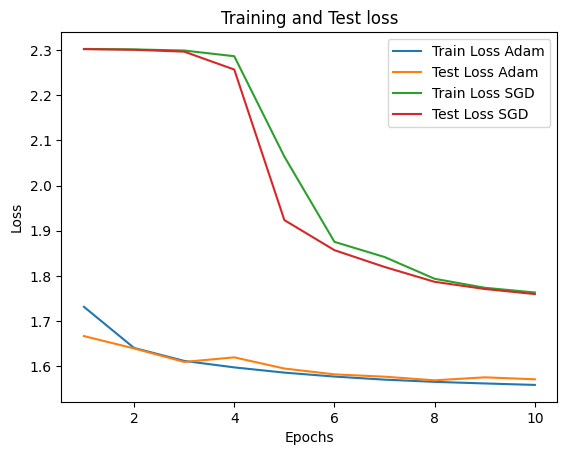

In [28]:
data = [train_history, test_history, train_history_sgd, test_history_sgd]
label = ['Train Loss Adam', 'Test Loss Adam', 'Train Loss SGD', 'Test Loss SGD']

plot_loss(data, label, 'Training and Test loss')

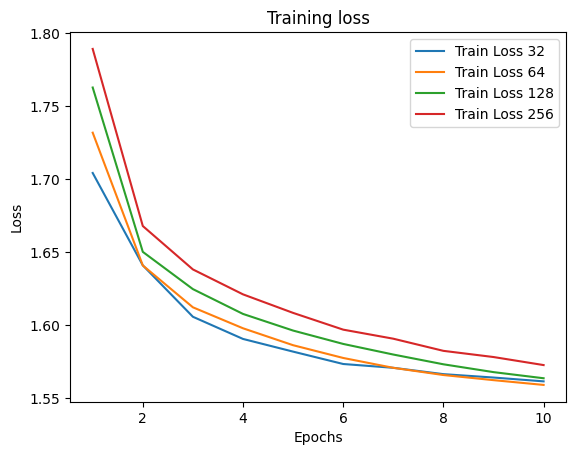

In [29]:
data = [train_history_32, train_history, train_history_128, train_history_256]
label = ['Train Loss 32', 'Train Loss 64', 'Train Loss 128', 'Train Loss 256']

plot_loss(data, label, 'Training loss')

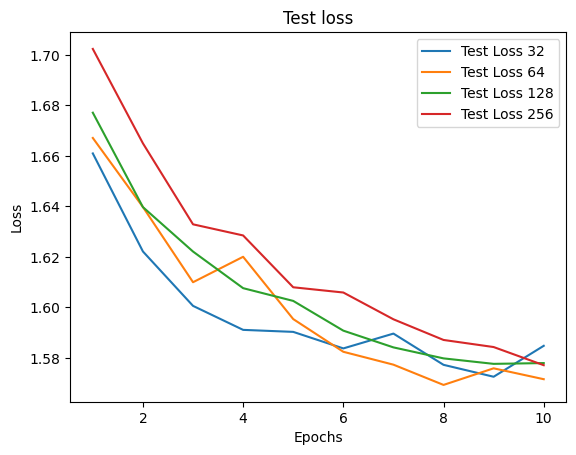

In [30]:
data = [test_history_32, test_history, test_history_128, test_history_256]
label = ['Test Loss 32', 'Test Loss 64', 'Test Loss 128', 'Test Loss 256']

plot_loss(data, label, 'Test loss')